# Равномерное распределение

> __Равномерное распределение__ — это распределение вероятностей, в качестве значений которого могут выступать любые целые числа от  до , а вероятности их появления одинаковы.  

Равномерное распределение применяется там, где нужны равновероятные модели.

Например, равномерное распределение пригодится, если для розыгрыша призов необходимо реализовать генератор случайных чисел, который будет с одинаковыми вероятностями выбирать натуральные числа в заданном интервале

- математическое ожидание 
$$
E[X] = \frac{N + 1}{2}
$$
- стандартное отклонение
$$
\sigma_X = \sqrt{\frac{N^2 - 1}{12}}
$$

In [2]:

import numpy as np
from scipy.stats import randint
import seaborn as sns

In [3]:
# Задаём возможные значения случайной величины
x = np.arange(1, 7)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)
# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)
display(x)
display(pmf)



# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)
display(cdf)

# ax = sns.displot(cdf, kde=True, color='dodgerblue')
# ax.set(xlabel='Значение случайной величины', ylabel='Частота')

array([1, 2, 3, 4, 5, 6])

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
       1.        ])

In [4]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 251)
# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)
# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print(cdf[249])

1.0


# Распределение Бернулли

> __Распределение Бернулли__, по сути, моделирует однократное подбрасывание «фальшивой» монеты. Это распределение вероятностей случайной величины, принимающей только два значения: 1 («успех») и 0 («неудача») с вероятностями p и p-1 соответственно. __Таким образом, распределение Бернулли описывает события, имеющие ровно два исхода.__ Такие события повсеместно встречаются в реальной жизни (выиграет команда чемпионат или нет, сдаст студент экзамен или провалит его, распознает алгоритм объект на фото или нет).  

-Формально описывается след образом
$$
P(X = x) = 
\begin{cases}
p, & x = 1 \\
1 - p, & x = 0
\end{cases}
$$
- Математическое ожидание
$$
E[X] = 1 \cdot p + 0 \cdot (1 - p) = p
$$
- Стандартное отклонение
$$
\sigma_X = \sqrt{p(1 - p)}
$$

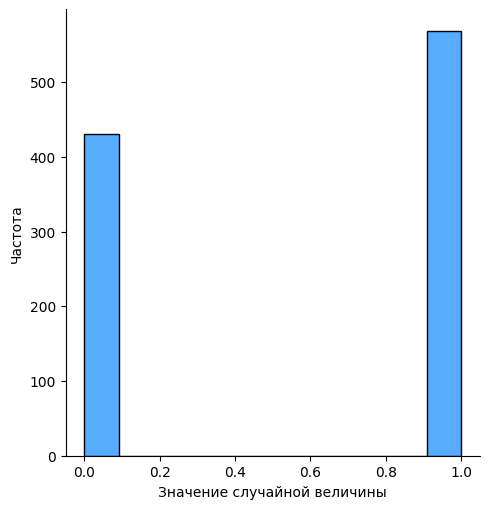

In [5]:
from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=1000, p=0.6)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

In [6]:
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 431]
 [  1 569]]


# Биномиальное распределение

- Повторение нескольких независимых испытаний Бернулли называется процессом Бернулли. Результаты процесса Бернулли в свою очередь будут следовать биномиальному распределению.
  

> __Биномиальным называют распределение__, при котором возможны только два исхода (успех или неудача, выигрыш или проигрыш) и вероятность успеха и неудачи одинакова для всех испытаний. Однако исходы не обязательно должны быть равновероятными, и каждое испытание не зависит от других.

Параметры биномиального распределения — n и p, где n — общее количество испытаний, а  p— вероятность успеха в каждом испытании.  

__Для того чтобы оценить вероятность, что среди  испытаний будет  успехов, используют следующую формулу:__
$$
 P(X = k) = \binom{n}{k} p^k (1 - p)^{n-k} 
$$
$
\binom{n}{k}
$
называют биномиальным коэффициентом, и он вычисляется следующим образом:
$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$
Математическое ожидание биномиального распределения равно:
$$
E[X] = np 
$$
Стандартное отклонение:
$$
\sigma_X = \sqrt{np(1 - p)}

## Пример 1  
Сравним две рекламные кампании: в одной конверсия составляет 2 %, но баннер увидит 100 000 пользователей, а в другой конверсия 40 %, но охват — всего 5 000 пользователей.



У нас есть следующая величина для количества пользователей, кликнувших по рекламе в первом случае:

$$
X \sim Binomial(n_X = 100000,\ p_X = 0.02)
$$

Случайная величина, отражающая количество пользователей, перешедших по рекламе, для второй рекламной кампании:

$$
Y \sim Binomial(n_Y = 5000,\ p_Y = 0.4)
$$



### Математическое ожидание и разброс для первой кампании

$$
E[X] = n_X p_X = 100000 \cdot 0.02 = 2000
$$

$$
\sigma_X = \sqrt{n_X p_X (1 - p_X)} 
= \sqrt{100000 \cdot 0.02 \cdot 0.98} 
\approx 44 \text{ человека}
$$


### Математическое ожидание и разброс для второй кампании

$$
E[Y] = n_Y p_Y = 5000 \cdot 0.4 = 2000
$$

$$
\sigma_Y = \sqrt{n_Y p_Y (1 - p_Y)}
= \sqrt{5000 \cdot 0.4 \cdot 0.6}
\approx 35 \text{ человек}
$$



Получаем, что ожидаемое количество кликов в обеих кампаниях одинаковое, так что более выгодным вариантом было бы выбрать менее затратную с финансовой точки зрения кампанию.


## Пример 2

Производитель гаджетов знает, что 20 % производимых им товаров — бракованные.

Если он производит десять изделий в день, какова вероятность того, что не более двух из них бракованные?  

- Для решения этой задачи мы уже будем использовать формулу и вычислять вероятность того, что за день производится от восьми до десяти небракованных изделий:
$$
 P(X = k) = \binom{n}{k} p^k (1 - p)^{n-k} 




In [7]:
import scipy

scipy.stats.binom.pmf(8,10,0.8)+scipy.stats.binom.pmf(9,10,0.8)+scipy.stats.binom.pmf(10,10,0.8)

np.float64(0.6777995264)

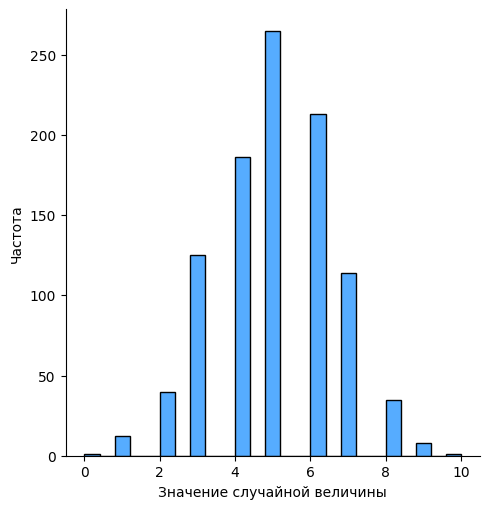

In [8]:
from numpy import random
import seaborn as sns

data = random.binomial(n=10, p=0.5, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

# Распределение Пуассона

> Распределение Пуассона — это дискретное распределение вероятностей числа событий, происходящих в данный период времени, с учётом среднего количества раз, когда событие происходит за этот период времени.

Допустим, у нас есть ресторан быстрого питания, в который приходят  в среднем Три посетителя в минуту. Однако это всего лишь средний показатель — фактический показатель может варьироваться.

Распределение Пуассона можно использовать для анализа вероятности различных событий, касающихся того, сколько клиентов придёт в ресторан. С его помощью можно рассчитать вероятность затишья (когда в течение какого-то периода времени не будет ни одного клиента), а также вероятность всплеска активности (когда в ресторан за минуту придут пять и более клиентов). Эта информация, в свою очередь, может помочь менеджеру спланировать рабочую нагрузку и график сотрудников, а также план по закупкам продуктов.

Кроме использования в планировании нагрузки на персонал и производство, распределение Пуассона также используется в биологии (обнаружение мутаций), финансах (прогнозирование количества заявлений о банкротстве или просрочек кредитов), информационной безопасности (предсказание количества вирусных атак) и любой другой ситуации, в которой события зависят от времени.

В распределении Пуассона значение случайной величины может быть любым неотрицательным числом. 
Случайная величина будет обладать следующими характеристиками:

$$
E[X] = \lambda
$$

$$
\sigma_X = \sqrt{\lambda}
$$

где \( \lambda \) — ожидаемое число событий за период времени.

Чтобы рассчитать вероятность того, что за период времени произойдёт \( k \) событий, 
можно пользоваться следующей формулой:

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

## Пример
Колл-центр получает в среднем 4.5 звонка за каждые пять минут. Каждый оператор может обработать один из этих вызовов в течение пяти минут. Если вызов получен, но оператор  не может его принять, то вызывающий абонент будет переведён в режим ожидания ответа.

Если вызовы следуют распределению Пуассона, какое минимальное количество операторов необходимо колл-центру, чтобы вероятность попадания вызова на удержание была не более 0.1?

Рассчитаем вероятности для всех возможных количеств операторов, пока не получим вероятность того, что вызов находится на удержании, которая будет меньше 10 %:

In [9]:
import scipy

scipy.stats.distributions.poisson.pmf(5, 4.5)

np.float64(0.17082685848611215)

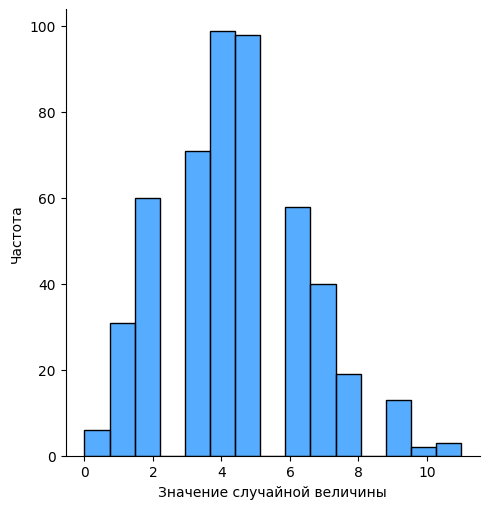

In [10]:
from numpy import random
import seaborn as sns

data = random.poisson(lam=4.5, size=500)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

In [23]:
scipy.stats.distributions.poisson.pmf(16, 16)

np.float64(0.09921753162215541)